# Glacier Mass Balance Sensitivity (the cliffnotes version)

This project aims to calculate glacier mass balance sensitivity from a number of glacier mass balance simulations using the Python Glacier Evolution Model (PyGEM). 

For full details on this project, please refer to the Glacier_Sensitivity file, which outlines data sources, data structures, background on mass balance, model physics, etc.. 

The functions run in this notebook are from the glacier_funct.py file, which I have developed for this project. Please refer to the file for more detailed documentation. 

First I will import the packages used in this project. 

In [1]:
import numpy as np
import pandas as pd 
import glob
import os 
import netCDF4 as nc 
import glacier_funct as gf
%matplotlib inline
filepath=os.getcwd()

#list of regions i will be working with

regions=[1,3,4,6,7,8,9]

## 1. Data Overview

First, let's take a look at the data that are input into the model. Starting with glacier data from the RGI. 

Summary data for individual glaciers are available in csv flies, divided by RGI region. Instead of importing eight individual files, let's will create a list of relevant filepaths.

In [3]:
dat_fp=sorted(glob.glob(filepath+'/Project_Data/Model_Input_Data/Hypsometry_Data/RGI/00_rgi60_attribs/*.csv'))

To better understand the file structure, let's pull up a file as an example.

In [4]:
temp=pd.read_csv(dat_fp[0])
print(temp.shape)
print(temp.columns)

(27108, 22)
Index(['RGIId', 'GLIMSId', 'BgnDate', 'EndDate', 'CenLon', 'CenLat',
       'O1Region', 'O2Region', 'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope',
       'Aspect', 'Lmax', 'Status', 'Connect', 'Form', 'TermType', 'Surging',
       'Linkages', 'Name'],
      dtype='object')


Of the 22 columns in this file, we are interested in:

RGIId: 
- Main identification number assigned to all glaciers by RGI and what this project uses for identification
- GLIMSId: Alternate identification number provided by the RGI that may help identify glaciers without an RGI number (more on this later)
- CenLon: Longitude at centerpoint of glacier
- CenLat: Latitude at centerpoint of glacier
- Area: Total glacier area
- Zmin: Minimum glacier altitude
- Zmax: Maximum glacier altitude
- Zmed: Median glacier altitude
- Slope: Average slope of glacier
- TermType: Description of the glacier terminus (i.e. does it terminate on land? in a lake? in the ocean?)

So let's take a look at these columns in a little more detail. Data exploration will happen a little later, when we compare all the regions. For now, let's look at how the data are input.

In [5]:
print(temp[['RGIId','GLIMSId','CenLon','CenLat','Area','Zmin','Zmax','Zmed','Slope','TermType']].dtypes)
temp[['RGIId','GLIMSId','CenLon','CenLat','Area','Zmin','Zmax','Zmed','Slope','TermType']].head()

RGIId        object
GLIMSId      object
CenLon      float64
CenLat      float64
Area        float64
Zmin          int64
Zmax          int64
Zmed          int64
Slope       float64
TermType      int64
dtype: object


,RGIId,GLIMSId,CenLon,CenLat,Area,Zmin,Zmax,Zmed,Slope,TermType
0,RGI60-01.00001,G213177E63689N,-146.823,63.689,0.360,1936,2725,2385,42.0,0
1,RGI60-01.00002,G213332E63404N,-146.668,63.404,0.558,1713,2144,2005,16.0,0
2,RGI60-01.00003,G213920E63376N,-146.080,63.376,1.685,1609,2182,1868,18.0,0
3,RGI60-01.00004,G213880E63381N,-146.120,63.381,3.681,1273,2317,1944,19.0,0
4,RGI60-01.00005,G212943E63551N,-147.057,63.551,2.573,1494,2317,1914,16.0,0


Some important observations: 

- All columns except RGIId and GLIMSId are numerical, meaning they are likely to only need minor adjustment before analysis and modelling
- CenLon and CenLat are in decimal degree format, meaning that direction/hemisphere is expressed numerically rather than through 'N'/'S'/'E'/'W'; something to keep in mind for plotting and analysis 
- Area is expressed in km$^2$ to 3 decimal points 
- Altitude is expressed in meters above sea level (m a.s.l) 
- Terminal type is expressed numerically; if we look at the technical notes pdf file, 0=land terminating, 1=lake terminating, and 2=ocean terminating 


Now we are ready to do some data visualization. With these datasets, we can determine the spatial, area, altitude, slope, and terminus type distribution of glaciers in each region. Understanding these distributions may provide insight into the sensitivity of glaciers in different regions to temperature increase.  

First, let's take a look at spatial distribution of the glaciers in the regions of interest. This will be most easily achieved by creating maps of glacier location.

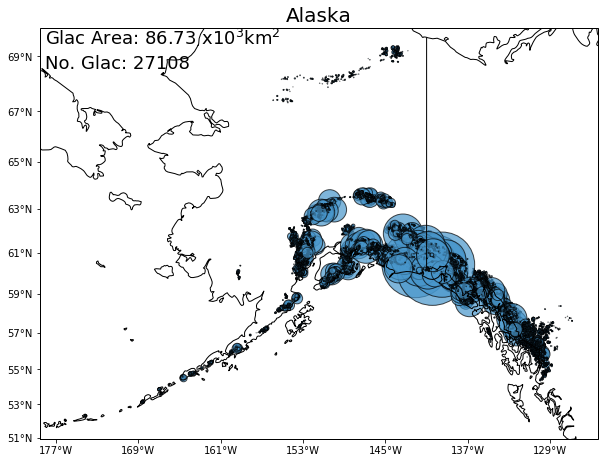

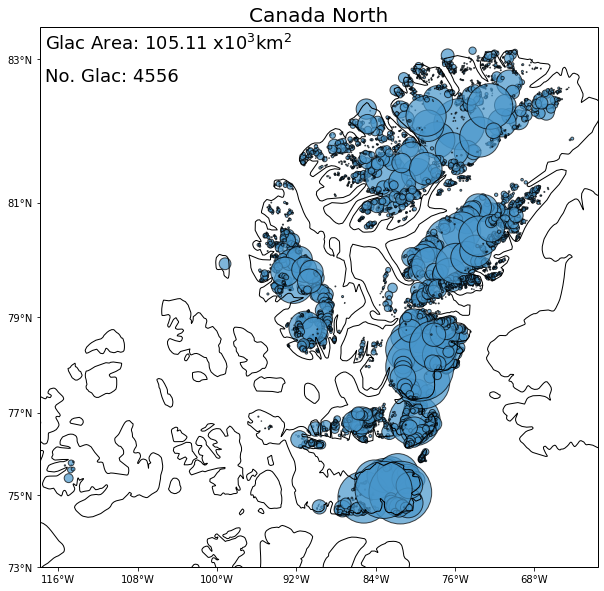

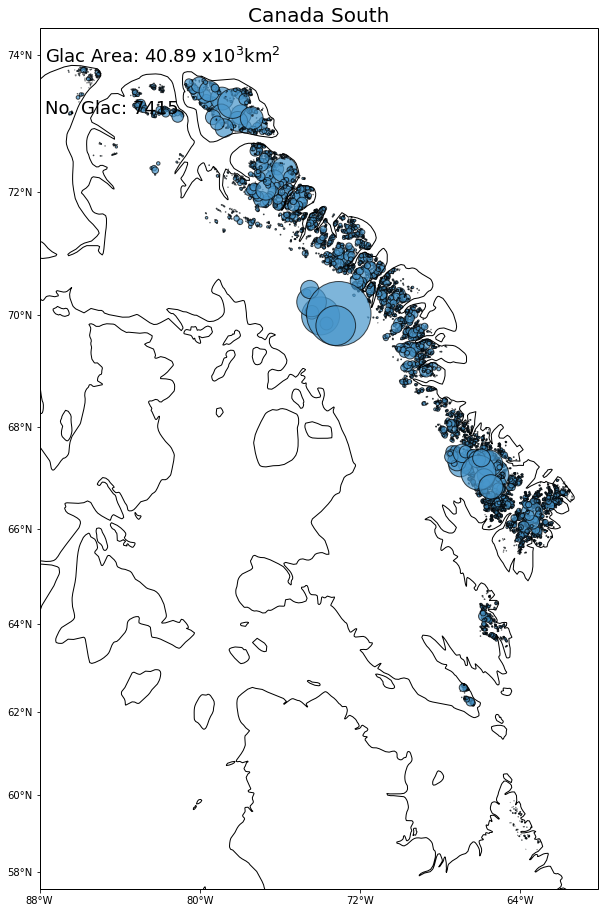

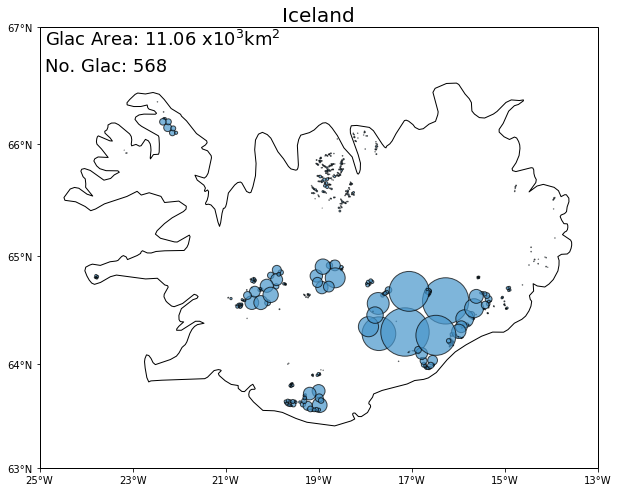

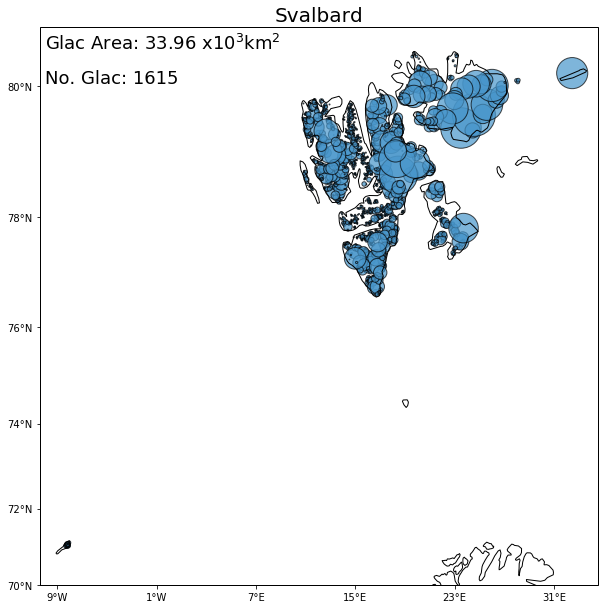

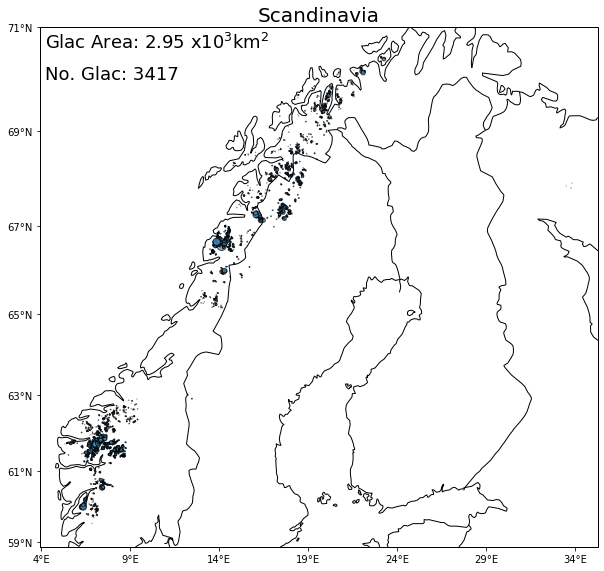

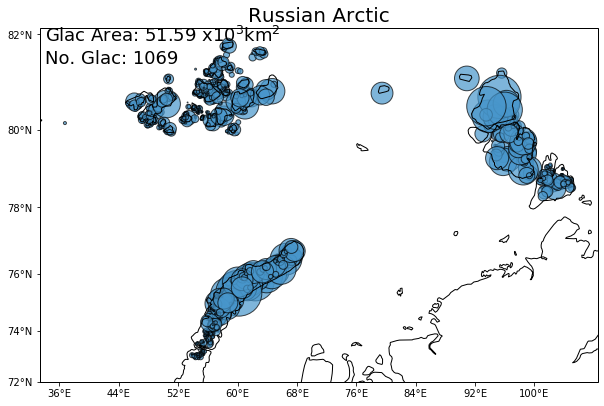

In [6]:
for x in regions: 
    temp=pd.read_csv([y for y in dat_fp if gf.rgi_num(x) + '_rgi60' in y][0], encoding='latin')
    
    gf.area_map(temp,x,areaname='Area')

From these maps, we can conclude that glaciers in the Arctic vary greatly in size, with glaciers in many regions (such as Alaska and Svandinavia) concentrated on the coast. This concentration is likely because coastal environments are likely to receive more precipitation that would allow for glaciers to exist. Regions with a large number of glaciers further inland likely have colder overall climates (such as Arctic Canada and the Russian Arctic), (whether due to altitude or latitude) which allows for glaciers to preserve for a longer period of time even without a large amount of accumulation.

Now let's look at the distributions of and quantify the glacier area, slope, and terminus type in each region of interest.

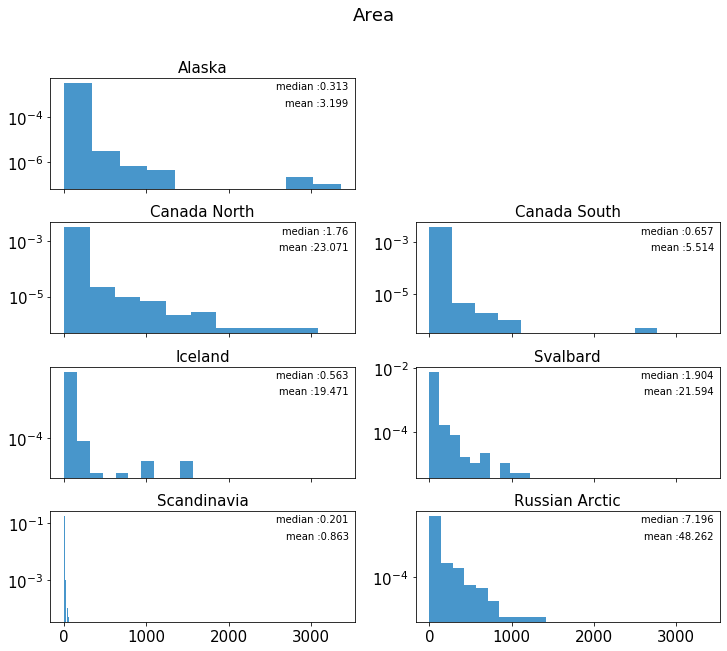

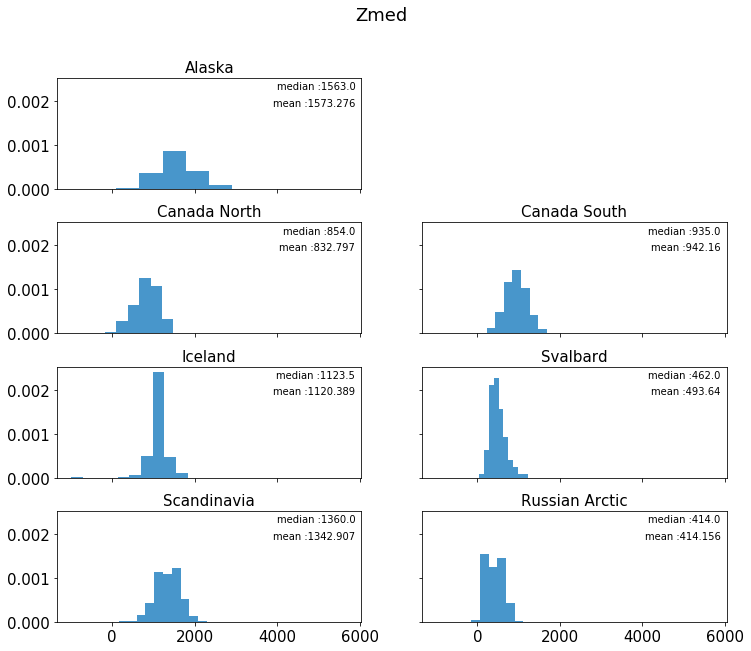

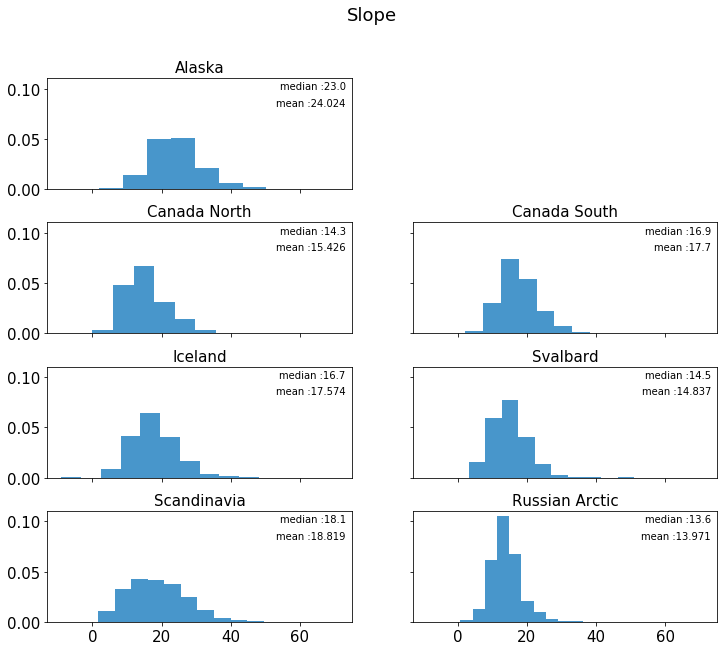

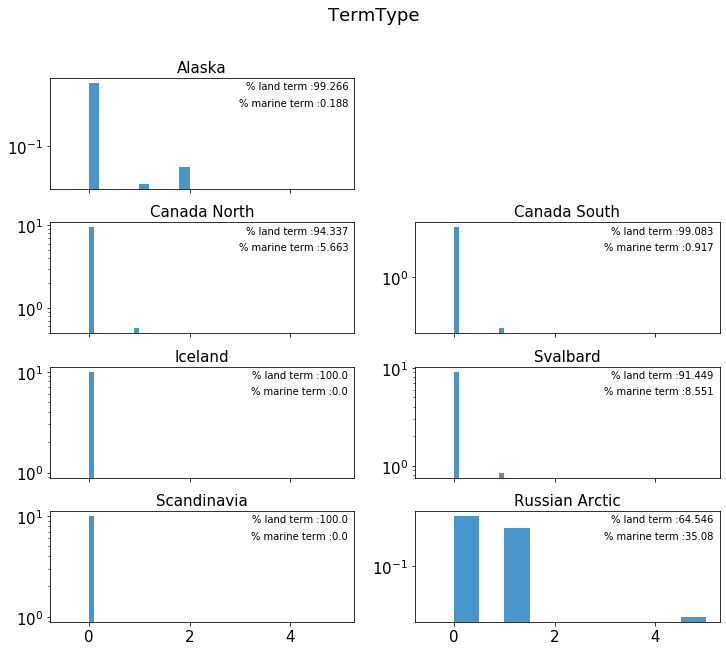

In [7]:
gf.hist_plots(dat_fp,regions=regions)

According to the median glacier area in each region, Arctic Canada North, Svalbard and the Russian Arctic have the largest glaciers while Iceland and Scandinavia have the smallest glaciers.Discrepancy between the relative mean and median values in Arctic Canada South and Iceland (where the mean area is larger than the median relative to the other regions of interest) suggests that these regions are dominated by small glaciers with a small number of large glaciers that account of the majority of the glacier volume. This interpretation appears to be consistent with the maps of these regions plotted above. Glaciers that are smaller will respond more quickly to air temperature increase, as more of the total glacier may be exposed to the atmosphere and surface air temperature.
 
According to the median altitude, glaciers Alaska and Scandinavia are located at the highest altitude, while glaciers in Arctic Canada North, Svalbard, and the Russian Arctic are located at the lowest altitudes. Glaciers at higher altitudes are likely to experience colder temperatures and less precipitations than glaciers at lower altitudes.

Glacier slope is relatively similar across all regions. However, glaciers in Alaska and Scandinavia have slightly steeper slopes in comparison other regions of interest while glaciers in Arctic Canada North and the Russian Arctic have slightly more gradual slopes. A steeper glacier slope may increase how quickly meltwater slides from a glacier. 

The majority of glaciers in the regions of interest are land-terminating (0). However, there are a substantial number of glaciers in the Russian Arctic that are marine-terminating (1). Marine terminating glaciers are subject to calving, where large portions of glacier ice break off the glacier terminus and become icebergs.

Now, let's take a look at glacier hypsometry data which gives information on glacier area/thickness at 10m elevation intervals for all glaciers in the world. 

In [3]:
dat_fp=sorted(glob.glob(filepath+'/Project_Data/Model_Input_Data/Hypsometry_Data/IceThickness/bands_10/*.csv'))
temp=pd.read_csv(dat_fp[0])
print(temp.shape)
print(temp.columns)

(27108, 624)
Index(['RGI-ID', 'Cont_range', '5', '15', '25', '35', '45', '55', '65', '75',
       ...
       '6125', '6135', '6145', '6155', '6165', '6175', '6185', '6195', '6205',
       '6215'],
      dtype='object', length=624)


So the folders are arranged by RGI number, and 10m elevation starting at 5m

Now let's take a look at the details of each column.

In [9]:
temp.head()

,RGI-ID,Cont_range,5,15,25,35,45,55,65,75,...,6125,6135,6145,6155,6165,6175,6185,6195,6205,6215
0,RGIv6.0.01-00001,0,-99,-99,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,...,-99.0,-99.0,-99,-99,-99,-99,-99,-99,-99,-99
1,RGIv6.0.01-00002,1,-99,-99,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,...,-99.0,-99.0,-99,-99,-99,-99,-99,-99,-99,-99
2,RGIv6.0.01-00003,1,-99,-99,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,...,-99.0,-99.0,-99,-99,-99,-99,-99,-99,-99,-99
3,RGIv6.0.01-00004,0,-99,-99,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,...,-99.0,-99.0,-99,-99,-99,-99,-99,-99,-99,-99
4,RGIv6.0.01-00005,1,-99,-99,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,...,-99.0,-99.0,-99,-99,-99,-99,-99,-99,-99,-99


The data are organized by RGI-ID and area/thickness values are split into 10m elevation bands, starting at 5m.

As per the PDF file that describe these data, a -99 value indicates there is no glacier mass at the elevation bin in question.

It is important to notice that the RGI ID values are written in a slightly different way in these datasets than in the RGI datasets that we just analyzed, which means that they cannot be matched or joined exactly. This is important to consider when using this dataset for modelling and analytics.

While we have already examined the glacier area and mean glacier altitude in each region, let's look in detail at the glacier volume per elevation band both in km3 and as a % of total glacier volume 

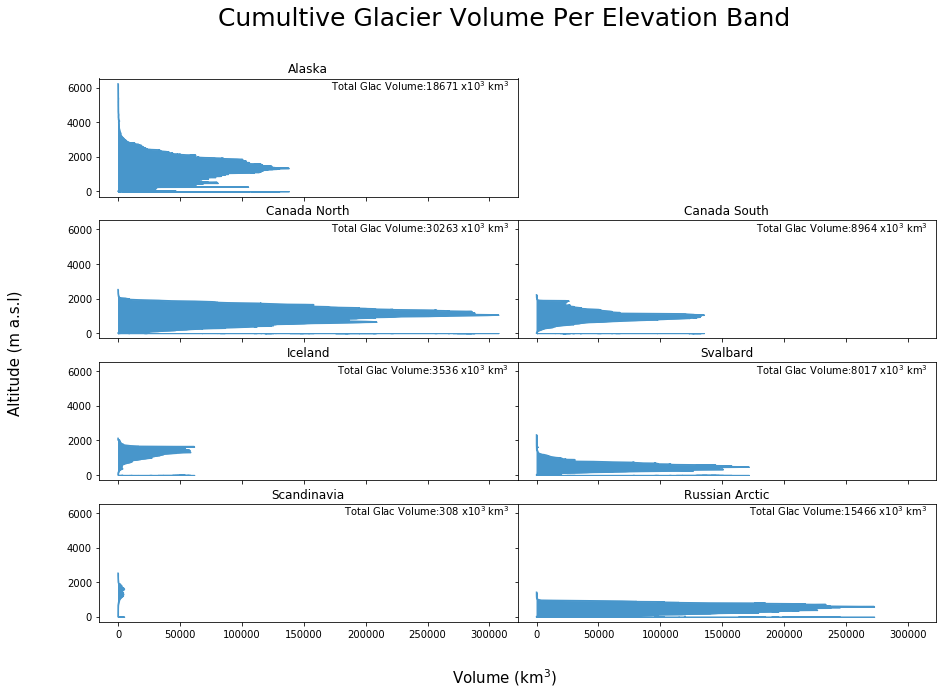

In [4]:
gf.hyps_plot(dat_fp, regions=regions)

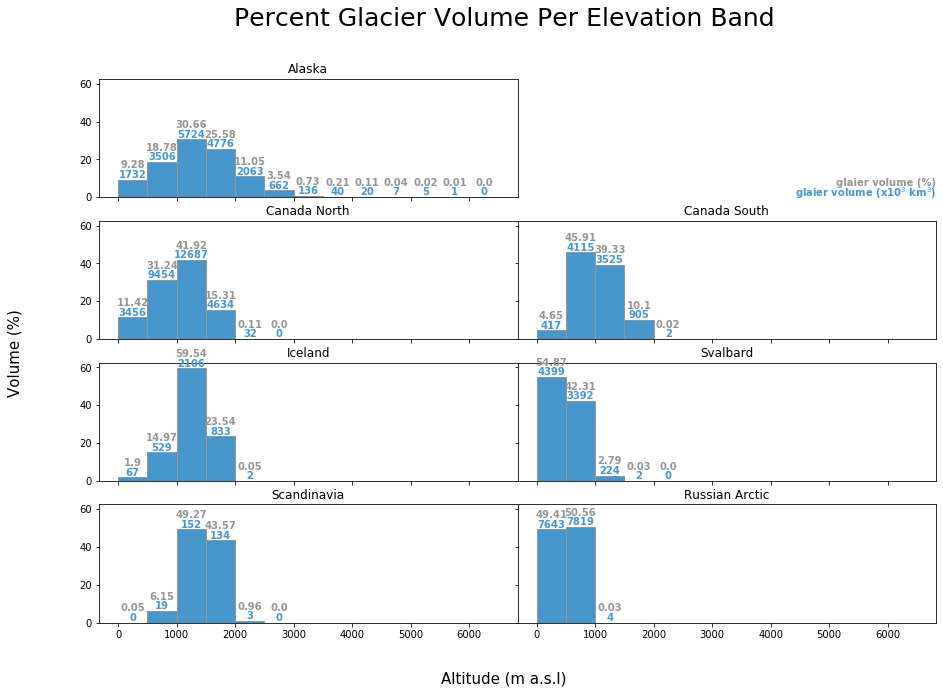

In [15]:
gf.hyps_plot(dat_fp, regions=regions, percent=True)

These visualizations confirm that glaciers in Alaska reach the highest altitudes overall and contain the largest percentage of total volume above 2000 m a.s.l (~ 15%). Scandinavia has the largest percentage of its total volume above 1500 m a.s.l (~ 45%, in comparison to Alaska's ~ 41%). However, because there is substantially more total glacier volume in Alaska than in Scandinavia, the total glacier volume above 1500 m a.s.l is larger in Alaska.

The largest percentage of glacier volume in Svalbard and the Russian Arctic (>95%) fall below 1000 m a.s.l, but the Russian Arctic has a more total glacier volume than Svalbard, meaning that more glacier volume will be available for melt at these altitudes in the Russian Arctic than in Svalbard.

Arctic Canada North and South have a similar distribution of percent glacier volume, with the majority of glacier volume falling between 500-1500 m a.s.l, however, because Arctic Canada North has more glacier volume in total, more glacier volume is available for melt in Arctic Canada North at these altitudes than Arctic Canada South.

Now let's take a look at available climate data, extracted from the ERA-Interim climate reanalysis product. 

These are stored in netCDF files. Let's take a look at how the data are structured.

In [2]:
era_temp=nc.Dataset(filepath+'/Project_Data/Model_Input_Data/Climate_Data/ERA_Int/ERAInterim_Temp.nc')
era_prec=nc.Dataset(filepath+'/Project_Data/Model_Input_Data/Climate_Data/ERA_Int/ERAInterim_Prec.nc')
era_temp.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (720,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (361,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: time
 current shape = (473,)
 filling on, default _FillValue of -2147483647 used,
 't2m': <class 'netCDF4._netCDF4.Variable'>
 int16 t2m(time, latitude, longitude)
     scale_factor: 0.0017505931157179397
     add_offset: 256.96055048469213
     _FillValue: -32767
     missing_value: -32767
     units: K
     long_name: 2 metre temperature

The variable era_temp contains three 1-d 'label' arrays (latitude, longitude, time) and one 3-d array to which the 1-d arrays correspond (2 m air surface temperature over time, across the select latitude and longitude coordinates). We can expect that era_prec (total precipitation) to have the same structure.

To get a better sense of the average temperature and total precipitation, let's plots these variables.

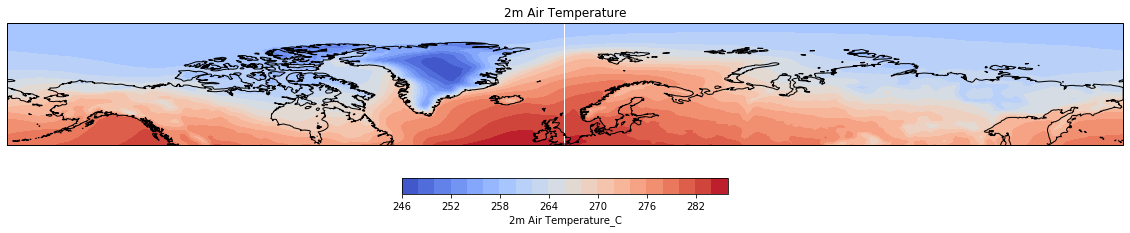

In [5]:
gf.reanalysis_map(era_temp,dat_type='t2m', latbound=[90,50])

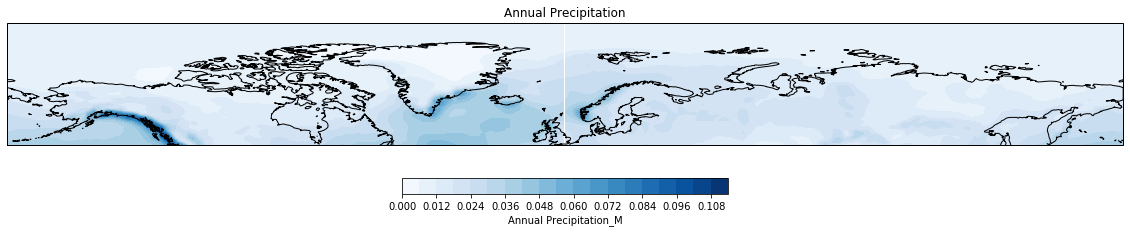

In [6]:
gf.reanalysis_map(era_prec,'tp',latbound=[90,50])

These visualizations suggest that mean annual temperature > 65 ˚N often falls below 0 ˚C, suggesting that Arctic Canada North, Arctic Canada South, Svalbard, and the Russian Arctic will experience colder temperatures all year and will provide fewer opportunities for glaciers to melt. Precipitation is highest at the coasts, particularly on the coasts of Alaska, Iceland, and Scandinavia, where annual temperatures are above 0 ˚C. These regions will likely receive more precipitation and therefore more accumulation onto the glacier surface.

While these maps provide a good approximation of climate conditions across the circum-Arctic, it is important to look more closely at glacier-specific climate in our regions of interest. Mean annual temperature and precipitation on each glacier between 1980 and 2017 were extracted from ERA-Interm using PyGEM. Let's plot these data.

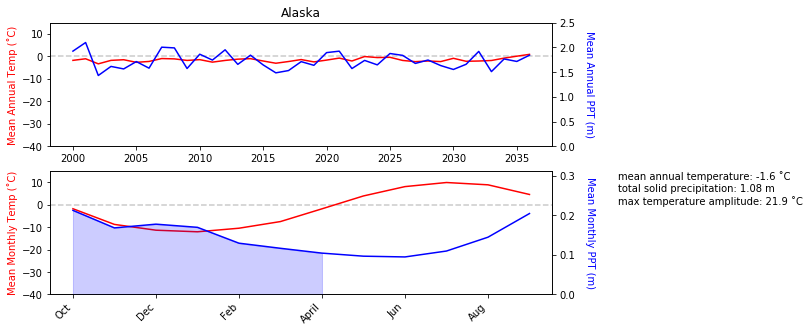

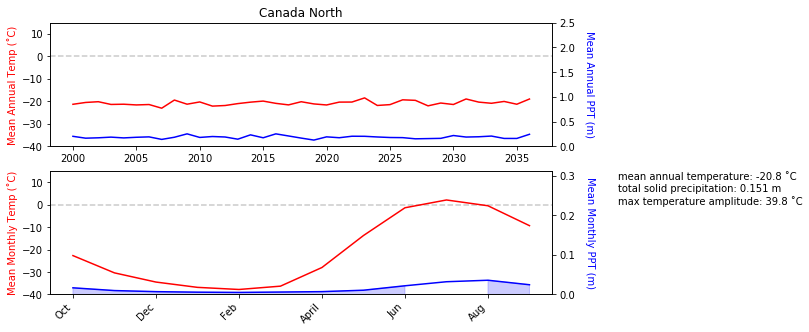

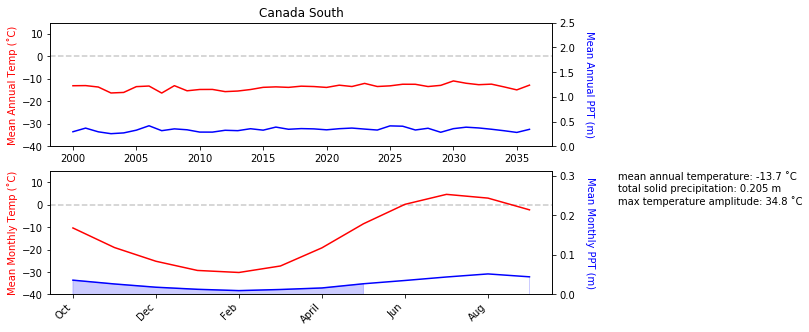

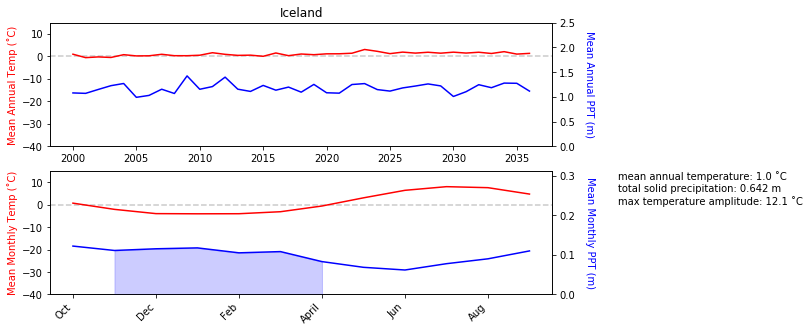

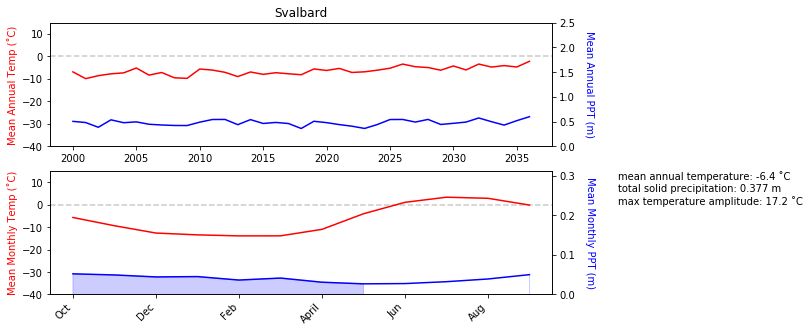

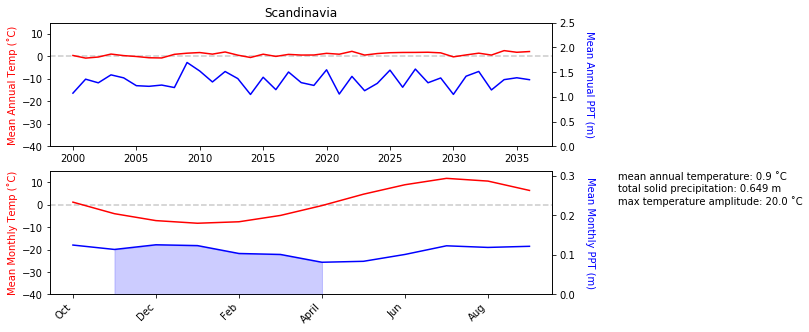

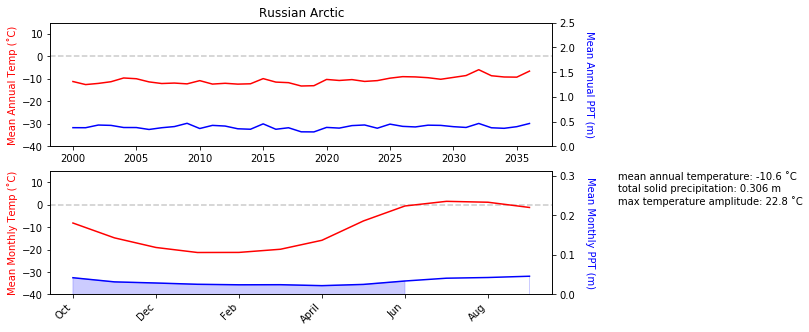

In [9]:
for x in regions: 
    subset_temp=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Climate_Data/ERAInt_Sim_Selection/RGI_'+gf.rgi_num(x)+'_ERA_Int_Glacier_Temp.csv').iloc[:,1:]
    subset_ppt=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Climate_Data/ERAInt_Sim_Selection/RGI_'+gf.rgi_num(x)+'_ERA_Int_Glacier_PPT.csv').iloc[:,1:]
    
    gf.climate_plots(subset_temp,subset_ppt, region=x)

Mean annual temperature on the regions' glaciers is highest in Iceland, followed by Scandinavia, and Alaska (1, 0.9, and -1.6 ˚C, respectively). Iceland, Scandinavia, and Alaska also have the smallest seasonal temperature amplitudes (12.1, 20.0, and 21.9 ˚C, respectively), and the largest total solid precipitation is in these regions as well (0.642, 0.649, and 1.08 m, respectively) over a relatively short accumulation season (5 months in Scandinavia and Iceland and 6 months in Alaska). These results suggest that the glaciers in Iceland, Scandinavia, and Alaska experience relatively mild climates, don't experience a lot of temperature variability and receive a lot of snow and rainfall.Based on these results, Iceland, Scandinavia, and Alaska are likely to be classified as 'maritime' regions.

Mean annual temperature on the region's glaciers is lowest in Arctic Canada North, Arctic Canada South, and the Russian Arctic (-20.8, -13.7, and -10.6 ˚C, respectively). These Regions also experience the highest seasonal temperature amplitude (39.8, 34.8, and 22.8 ˚C, respectively). These regions also experience the lowest rates or precipitation (0.151, 0.205, and 0.306 m, respectively) over a relatively long accumulation season (9, 7, and 8 months in Arctic Canada North, Arctic Canada South, and the Russian Arctic, respectively). These results suggest that Arctic Canada North, Arctic Canada South, and the Russian Arctic are likely to be classified as 'continental' regions.

Svalbad's climate is in between the maritime and continental regions. The air temperature and precipitation are higher than in the continental regions but lower than in the maritime regions (-6.4 ˚C and 0.377 m, respectively). Svalbard's seasonal temperature amplitude is the second highest of all regions (17.2 ˚C), suggesting that the temperature oscillates at a slightly lower range than in the maritime regions. Because both the temperature and precipitation in Svalbard are closer to the continental rather than maritime regions, Svalbard is also likely classified as 'continental'.

Now, let's take a look at the available glacier mass balance data from the WGMS. 

The majority of glacier melt data recorded by the WGMS is either geodetic or glaciological, separated into two different .csv files (D-CHANGE, and EE-MASS-BALANCE, respectively), and both will be used in this project for model calibration.

Let's take a look at how the geodetic data data are recorded.

In [10]:
geo_dat=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-D-CHANGE.csv', encoding='latin')

geo_dat.head()

,POLITICAL_UNIT,NAME,SURVEY_ID,WGMS_ID,YEAR,LOWER_BOUND,UPPER_BOUND,AREA_SURVEY_YEAR,AREA_CHANGE,AREA_CHANGE_UNC,...,SD_PLATFORM_METHOD,REFERENCE_DATE,RD_PLATFORM_METHOD,INVESTIGATOR,SPONS_AGENCY,REFERENCE,REMARKS,PUB_IN_FOG,PUB_IN_GGCB,REF_ID
0,AF,UNNAMED 13308,10116,13308,2016,9999,9999,NaN,NaN,NaN,...,sP,20009999.0,sP,Fanny Brun,"Univ. Grenoble Alpes, CNRS, IRD, Grenoble INP,...","Brun et al. (2017); Nature Geoscience, 10(9), ...",More than 50 000 DEMs were derived from the va...,NaN,NaN,NaN
1,AF,UNNAMED 13310,10118,13310,2016,9999,9999,NaN,NaN,NaN,...,sP,20009999.0,sP,Fanny Brun,"Univ. Grenoble Alpes, CNRS, IRD, Grenoble INP,...","Brun et al. (2017); Nature Geoscience, 10(9), ...",More than 50 000 DEMs were derived from the va...,NaN,NaN,NaN
2,AF,UNNAMED 13311,10119,13311,2016,9999,9999,NaN,NaN,NaN,...,sP,20009999.0,sP,Fanny Brun,"Univ. Grenoble Alpes, CNRS, IRD, Grenoble INP,...","Brun et al. (2017); Nature Geoscience, 10(9), ...",More than 50 000 DEMs were derived from the va...,NaN,NaN,NaN
3,AF,UNNAMED 13312,10120,13312,2016,9999,9999,NaN,NaN,NaN,...,sP,20009999.0,sP,Fanny Brun,"Univ. Grenoble Alpes, CNRS, IRD, Grenoble INP,...","Brun et al. (2017); Nature Geoscience, 10(9), ...",More than 50 000 DEMs were derived from the va...,NaN,NaN,NaN
4,AF,UNNAMED 13582,24806,13582,2010,9999,9999,2.141,NaN,NaN,...,sP,20000817.0,sP,"Martina Barandun, Robert McNabb","Department of Geosciences, University of Frib...",NaN,Granule name of the reference/survey DEM: AST_...,NaN,NaN,NaN


Some key observations:

- Mass balance change is recorded as thickness change and will need to be converted to m w.e.
- The year in which the measurement was taken is recorded, as is the specific survey and reference date, which provide the month of measurement as well. These will be important in order to convert to water year (October-September), which is used for measurement of mass balance.
- While there is a Survey and WGMS ID attached to the glacier measurements (as well as the political area in which the glacier is found), there is no RGI ID, which is what PyGEM uses to reference glaciers. This issue will also need to be addressed

Let's take a look at the glaciological data.

In [11]:
glac_dat=pd.read_csv(filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019/WGMS-FoG-2019-12-EE-MASS-BALANCE.csv', encoding='latin')

glac_dat.head()

,POLITICAL_UNIT,NAME,WGMS_ID,YEAR,LOWER_BOUND,UPPER_BOUND,AREA,WINTER_BALANCE,WINTER_BALANCE_UNC,SUMMER_BALANCE,SUMMER_BALANCE_UNC,ANNUAL_BALANCE,ANNUAL_BALANCE_UNC,REMARKS
0,AQ,ALBERICH,1062,1972,9999,9999,1.36,0.0,NaN,10.0,NaN,20.0,NaN,NaN
1,AQ,ALBERICH,1062,1973,9999,9999,1.36,0.0,NaN,30.0,NaN,30.0,NaN,NaN
2,AQ,ALBERICH,1062,1974,9999,9999,1.36,-10.0,NaN,0.0,NaN,-20.0,NaN,NaN
3,AQ,ALBERICH,1062,1975,9999,9999,1.36,10.0,NaN,0.0,NaN,10.0,NaN,NaN
4,AQ,ANVERS I ICE CAP,3954,1966,9999,9999,NaN,NaN,NaN,NaN,NaN,44.0,NaN,Multi-annual observation (87 mm w.e.) evenly d...


The glaciological dataset has a similar structure to the geodetic dataset. Here are some key observations: 

- LOWER_BOUND and UPPER_BOUND contain important information in the glaciological dataset, as per the pdf file description; a glacier may have multiple stake measurements the locations of which will be recorded in the LOWER_BOUND and UPPER_BOUND categories, with '9999' indicating mass balance extrapolated across the entire glacier 
- There are both summer and winter balances, but we are only interested in ANNUAL_BALANCE, recorded in mm w.e. 
- While a geodetic datapoint could contain a mass balance measurement that spans multiple years, glaciological measurements will only span a single year. 
- Once more, there is only references to a political unit, glacier name and WGMS ID, and not to an RGI ID, meaning that these glacier measurements will need to be linked to the appropriate RGI glacier numbers. 

I have created a function to process these data and conert them into a format compatible with the RGI. Please refer to the glac_funct.py file or the full Glacier Sensitivity notebook for further documentation/logic.

First let's initialize the class object.

In [2]:
glac_fp=filepath+'/Project_Data/Model_Input_Data/Glacier_Data/WGMS_2019'

geo_fp=filepath+'/Project_Data/Model_Input_Data/Hypsometry_Data/RGI'

mass_dat=gf.obs_massbal(glac_fp, geo_fp)

Now let's do the preprocessing.

In [6]:
mass_dat.massbal_process(regions=regions, yearstart=1960)

/Users/anna/Desktop/PERSONAL/Data_Science/Portfolio_Projects/glacier_funct.py:764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff['val']=latlon_diff[latlon_diff<=0.004]
/Users/anna/Desktop/PERSONAL/Data_Science/Portfolio_Projects/glacier_funct.py:766: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_dict['RGI_ID'][x]=diff['RGIId'].values[0]
/Users/anna/Desktop/PERSONAL/Data_Science/Portfolio_Projects/glacier_funct.py:770: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

RGI60-01.04516
RGI60-01.21014
RGI60-01.16342
RGI60-01.20937
RGI60-01.25453
RGI60-01.16545
RGI60-01.11421
RGI60-01.03360
RGI60-01.11477
RGI60-01.02467
RGI60-01.13879
RGI60-01.11512
RGI60-01.01304
RGI60-01.25840
RGI60-01.13838
RGI60-01.01306
RGI60-01.01513
RGI60-01.16112
RGI60-01.10044
RGI60-01.13470
RGI60-01.24896
RGI60-01.02245
RGI60-01.03470
RGI60-01.17626
RGI60-01.10371
RGI60-01.08633
RGI60-01.01519
RGI60-01.17067
RGI60-01.08992
RGI60-01.08731
RGI60-01.08638
RGI60-01.15329
RGI60-01.17123
RGI60-01.24104
RGI60-01.09791
RGI60-01.26689
RGI60-01.11657
RGI60-01.02238
RGI60-01.19702
RGI60-01.10029
RGI60-01.22909
RGI60-01.01921
RGI60-01.17899
RGI60-01.02315
RGI60-01.24135
RGI60-01.09440
RGI60-01.08917
RGI60-01.00408
RGI60-01.23022
RGI60-01.02234
RGI60-01.25514
RGI60-01.01837
RGI60-01.08553
RGI60-01.19343
RGI60-01.17876
RGI60-01.02206
RGI60-01.18016
RGI60-01.09205
RGI60-01.17907
RGI60-01.02170
RGI60-01.24140
RGI60-01.10098
RGI60-01.22590
RGI60-01.08171
RGI60-01.09107
RGI60-01.02230
RGI60-01.1

RGI60-01.09219
RGI60-01.08206
RGI60-01.18858
RGI60-01.12099
RGI60-01.18975
RGI60-01.12123
RGI60-01.12433
RGI60-01.01918
RGI60-01.12422
RGI60-01.19570
RGI60-01.12429
RGI60-01.09292
RGI60-01.26696
RGI60-01.19926
RGI60-01.12414
RGI60-01.12501
RGI60-01.01940
RGI60-01.12622
RGI60-01.19241
RGI60-01.19947
RGI60-01.19218
RGI60-01.12260
RGI60-01.11226
RGI60-01.18815
RGI60-01.12169
RGI60-01.08228
RGI60-01.01900
RGI60-01.24315
RGI60-01.08320
RGI60-01.18859
RGI60-01.08272
RGI60-01.19960
RGI60-01.12024
RGI60-01.25063
RGI60-01.19263
RGI60-01.22025
RGI60-01.19478
RGI60-01.18919
RGI60-01.18962
RGI60-01.18842
RGI60-01.18880
RGI60-01.18415
RGI60-01.12493
RGI60-01.01582
RGI60-01.18930
RGI60-01.11986
RGI60-01.01901
RGI60-01.18732
RGI60-01.18734
RGI60-01.18952
RGI60-01.22157
RGI60-01.22117
RGI60-01.18849
RGI60-01.10944
RGI60-01.18772
RGI60-01.18902
RGI60-01.22358
RGI60-01.22146
RGI60-01.19016
RGI60-01.19816
RGI60-01.20157
RGI60-01.22217
RGI60-01.22373
RGI60-01.01806
RGI60-01.22389
RGI60-01.18558
RGI60-01.1

RGI60-06.00301
RGI60-06.00261
RGI60-06.00237
RGI60-06.00090
RGI60-06.00294
RGI60-06.00479
RGI60-06.00304
RGI60-06.00094
RGI60-06.00028
RGI60-06.00568
RGI60-06.00474
RGI60-06.00513
RGI60-06.00001
RGI60-06.00002
RGI60-06.00003
RGI60-06.00005
RGI60-06.00006
RGI60-06.00007
RGI60-06.00008
RGI60-06.00009
RGI60-06.00010
RGI60-06.00013
RGI60-06.00014
RGI60-06.00015
RGI60-06.00017
RGI60-06.00025
RGI60-06.00026
RGI60-06.00027
RGI60-06.00029
RGI60-06.00036
RGI60-06.00041
RGI60-06.00044
RGI60-06.00046
RGI60-06.00048
RGI60-06.00049
RGI60-06.00052
RGI60-06.00055
RGI60-06.00057
RGI60-06.00058
RGI60-06.00061
RGI60-06.00066
RGI60-06.00067
RGI60-06.00069
RGI60-06.00071
RGI60-06.00072
RGI60-06.00078
RGI60-06.00079
RGI60-06.00081
RGI60-06.00085
RGI60-06.00087
RGI60-06.00089
RGI60-06.00096
RGI60-06.00098
RGI60-06.00100
RGI60-06.00102
RGI60-06.00104
RGI60-06.00105
RGI60-06.00106
RGI60-06.00109
RGI60-06.00112
RGI60-06.00113
RGI60-06.00121
RGI60-06.00130
RGI60-06.00133
RGI60-06.00137
RGI60-06.00140
RGI60-06.0

RGI60-07.00404
RGI60-07.00405
RGI60-07.00407
RGI60-07.00409
RGI60-07.00410
RGI60-07.00411
RGI60-07.00413
RGI60-07.00414
RGI60-07.00416
RGI60-07.00417
RGI60-07.00418
RGI60-07.00419
RGI60-07.00420
RGI60-07.00421
RGI60-07.00430
RGI60-07.00431
RGI60-07.00432
RGI60-07.00433
RGI60-07.00435
RGI60-07.00437
RGI60-07.00438
RGI60-07.00439
RGI60-07.00440
RGI60-07.00441
RGI60-07.00442
RGI60-07.00443
RGI60-07.00444
RGI60-07.00446
RGI60-07.00447
RGI60-07.00448
RGI60-07.00449
RGI60-07.00453
RGI60-07.00454
RGI60-07.00455
RGI60-07.00456
RGI60-07.00457
RGI60-07.00458
RGI60-07.00459
RGI60-07.00462
RGI60-07.00463
RGI60-07.00465
RGI60-07.00466
RGI60-07.00467
RGI60-07.00468
RGI60-07.00469
RGI60-07.00470
RGI60-07.00471
RGI60-07.00472
RGI60-07.00473
RGI60-07.00475
RGI60-07.00480
RGI60-07.00481
RGI60-07.00482
RGI60-07.00483
RGI60-07.00487
RGI60-07.00488
RGI60-07.00489
RGI60-07.00491
RGI60-07.00495
RGI60-07.00497
RGI60-07.00498
RGI60-07.00499
RGI60-07.00500
RGI60-07.00501
RGI60-07.00503
RGI60-07.00505
RGI60-07.0

RGI60-07.01217
RGI60-07.01218
RGI60-07.01219
RGI60-07.01220
RGI60-07.01221
RGI60-07.01222
RGI60-07.01224
RGI60-07.01225
RGI60-07.01226
RGI60-07.01227
RGI60-07.01228
RGI60-07.01229
RGI60-07.01232
RGI60-07.01233
RGI60-07.01234
RGI60-07.01236
RGI60-07.01237
RGI60-07.01238
RGI60-07.01239
RGI60-07.01240
RGI60-07.01241
RGI60-07.01244
RGI60-07.01245
RGI60-07.01251
RGI60-07.01252
RGI60-07.01253
RGI60-07.01254
RGI60-07.01257
RGI60-07.01258
RGI60-07.01260
RGI60-07.01263
RGI60-07.01265
RGI60-07.01266
RGI60-07.01267
RGI60-07.01268
RGI60-07.01269
RGI60-07.01270
RGI60-07.01271
RGI60-07.01272
RGI60-07.01273
RGI60-07.01275
RGI60-07.01279
RGI60-07.01280
RGI60-07.01281
RGI60-07.01282
RGI60-07.01283
RGI60-07.01289
RGI60-07.01291
RGI60-07.01292
RGI60-07.01293
RGI60-07.01294
RGI60-07.01296
RGI60-07.01297
RGI60-07.01299
RGI60-07.01300
RGI60-07.01302
RGI60-07.01306
RGI60-07.01309
RGI60-07.01310
RGI60-07.01314
RGI60-07.01316
RGI60-07.01317
RGI60-07.01321
RGI60-07.01324
RGI60-07.01326
RGI60-07.01327
RGI60-07.0

RGI60-08.00482
RGI60-08.00485
RGI60-08.00492
RGI60-08.00496
RGI60-08.00497
RGI60-08.00499
RGI60-08.00507
RGI60-08.00514
RGI60-08.00515
RGI60-08.00521
RGI60-08.00522
RGI60-08.00533
RGI60-08.00535
RGI60-08.00538
RGI60-08.00540
RGI60-08.00542
RGI60-08.00549
RGI60-08.00551
RGI60-08.00552
RGI60-08.00554
RGI60-08.00560
RGI60-08.00568
RGI60-08.00582
RGI60-08.00584
RGI60-08.00611
RGI60-08.00613
RGI60-08.00630
RGI60-08.00639
RGI60-08.00640
RGI60-08.00649
RGI60-08.00651
RGI60-08.00658
RGI60-08.00709
RGI60-08.00716
RGI60-08.00718
RGI60-08.00733
RGI60-08.00742
RGI60-08.00743
RGI60-08.00747
RGI60-08.00752
RGI60-08.00753
RGI60-08.00755
RGI60-08.00756
RGI60-08.00757
RGI60-08.00761
RGI60-08.00762
RGI60-08.00765
RGI60-08.00767
RGI60-08.00771
RGI60-08.00772
RGI60-08.00778
RGI60-08.00779
RGI60-08.00790
RGI60-08.00797
RGI60-08.00808
RGI60-08.00811
RGI60-08.00812
RGI60-08.00814
RGI60-08.00816
RGI60-08.00827
RGI60-08.00831
RGI60-08.00845
RGI60-08.00854
RGI60-08.00869
RGI60-08.00877
RGI60-08.00878
RGI60-08.0

RGI60-08.02155
RGI60-08.00502
RGI60-08.01186
RGI60-08.00861
RGI60-08.00335
RGI60-08.01781
RGI60-08.01226
RGI60-08.02256
RGI60-08.02235
RGI60-08.00333
RGI60-08.01100
RGI60-08.01093
RGI60-08.01139
RGI60-08.02866
RGI60-08.00973
RGI60-08.00997
RGI60-08.00781
RGI60-08.00819
RGI60-08.00818
RGI60-08.00134
RGI60-08.00109
RGI60-08.00157
RGI60-08.00147
RGI60-08.00184
RGI60-08.00013
RGI60-08.00128
RGI60-08.00227
RGI60-08.00008
RGI60-08.00136
RGI60-08.00229
RGI60-08.00009
RGI60-08.00072
RGI60-08.00265
RGI60-08.00057
RGI60-08.00251
RGI60-08.00017
RGI60-08.00259
RGI60-08.00249
RGI60-08.00202
RGI60-08.00171
RGI60-08.00245
RGI60-08.00019
RGI60-08.00161
RGI60-08.00155
RGI60-08.00199
RGI60-08.00270
RGI60-08.00121
RGI60-08.00191
RGI60-08.00122
RGI60-08.00233
RGI60-08.00194
RGI60-08.00267
RGI60-08.00107
RGI60-08.00042
RGI60-08.00096
RGI60-08.00037
RGI60-08.00137
RGI60-08.00132
RGI60-08.00146
RGI60-08.00053
RGI60-08.00221
RGI60-08.00183
RGI60-08.00214
RGI60-08.00024
RGI60-08.00220
RGI60-08.00006
RGI60-08.0

In [7]:
#extract the results
full_final,geo_final,glac_final, id_dict=mass_dat.preprocess_results()
geo_final.head()

,Year,Area,AW_SUM,Spec_Massbal,REGION_NO
12,1960.0,3400.669,1.0,-0.110444,1.0
13,1961.0,3401.862,1.0,-0.111232,1.0
14,1962.0,3401.862,1.0,-0.111232,1.0
15,1963.0,3401.965,1.0,-0.111221,1.0
16,1964.0,3407.699,1.0,-0.116984,1.0


Let's first map which glaciers have data available between 1960-2018 (over which the majority of mass balance was recorded)

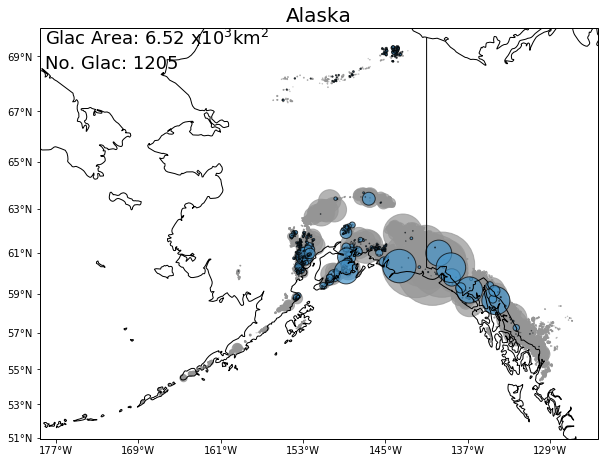

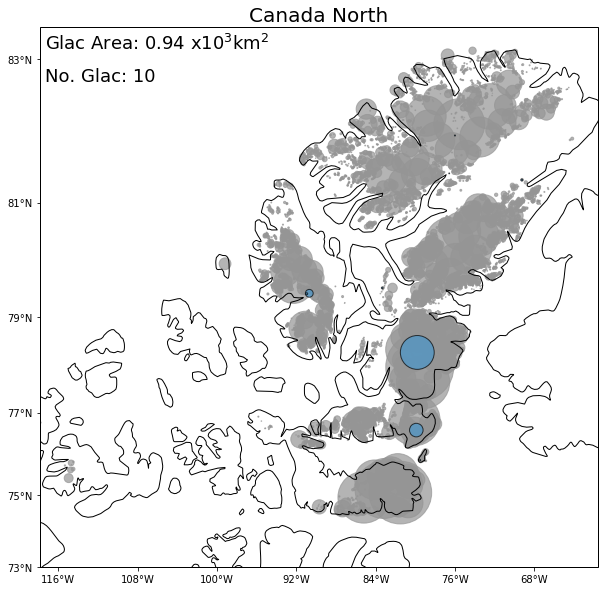

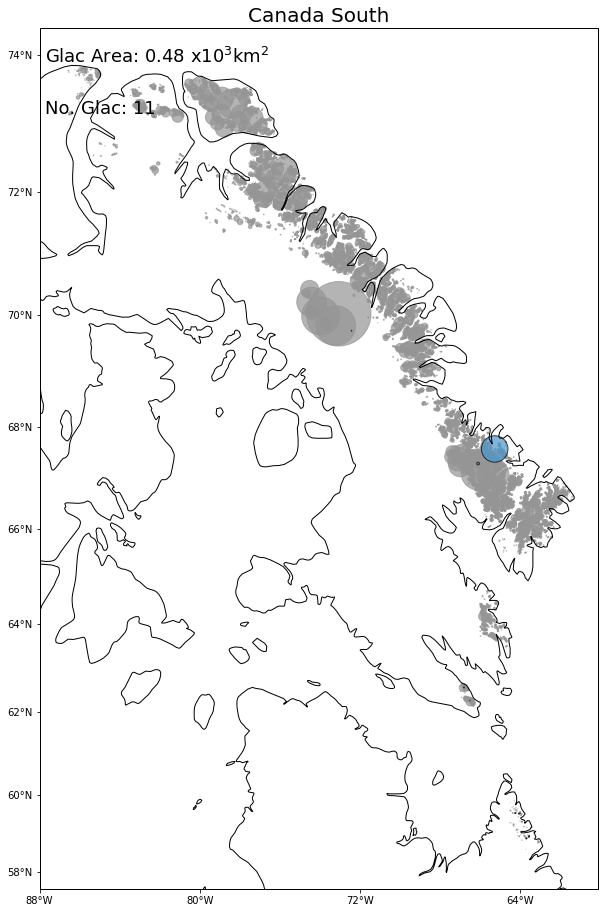

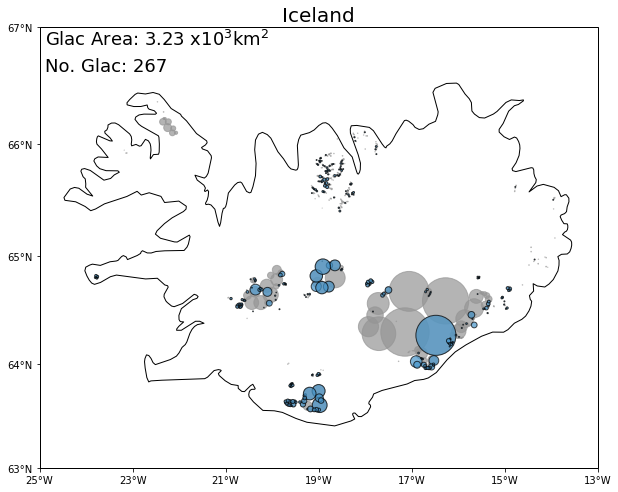

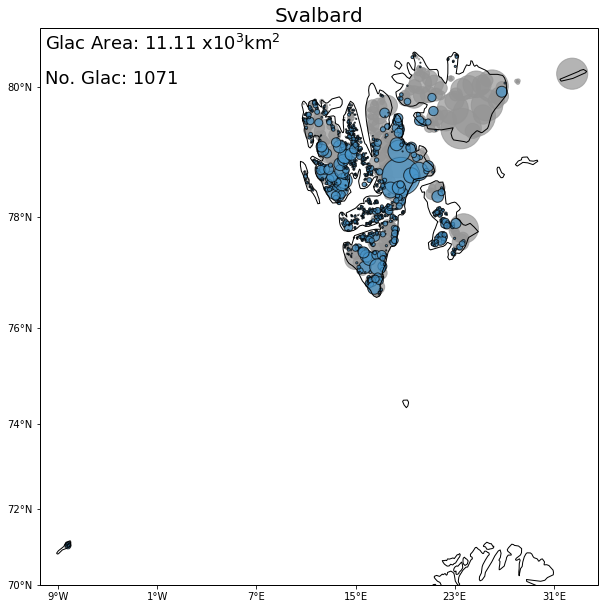

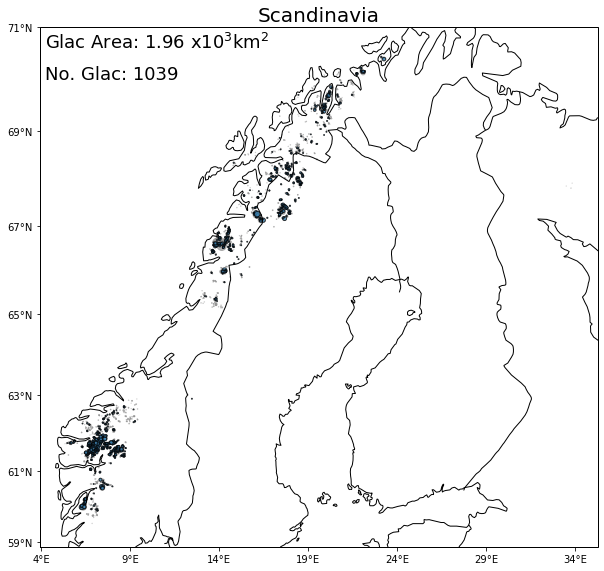

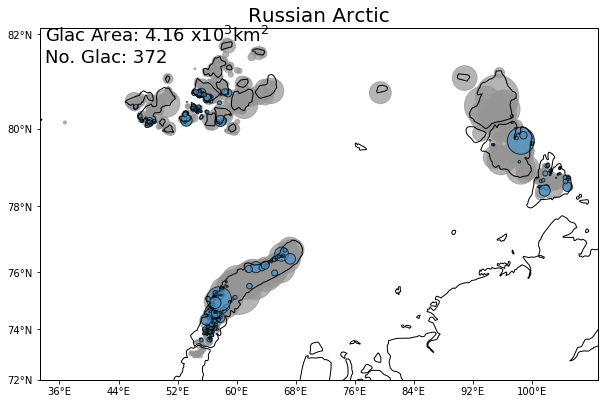

In [8]:
for x in regions: 
    temp=id_dict[id_dict['REGION_NO']==x]
    gf.area_map(temp,x,latname='LATITUDE',longname='LONGITUDE',
                areaname='Area',plotbase=True)

This map shows the spatial distribution of glaciers which have data available for calibration.

Scandinavia, Svalbard, and Iceland all have a reasonable number of measurements which cover 66, 32, and 29% of their total glacier area, respectively. While substantially fewer, Russian Arctic and Alaska both still have a reasonable number of measurements for analysis (8.1 and 7.2%, respectively). Arctic Canada North and South have the fewest number of measurements with 0.9 and 1.2 % of total glacier area covered by observational measurements. 

Now, let's take a look at specific mass balance in each region with all available data, glaciological, and geodetic data. 

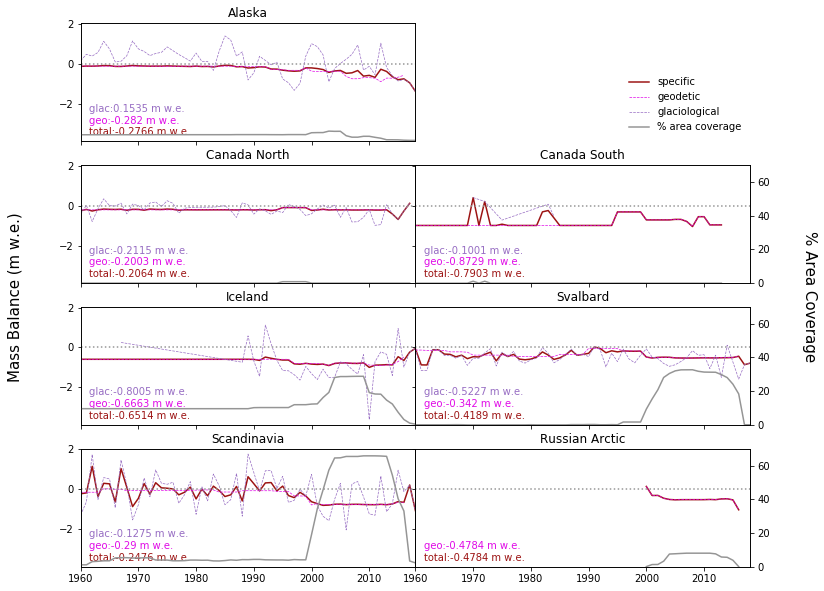

In [9]:
mass_dat.plot_massbal()

The mean regional mass balance for 1960-2018 is smallest in Arctic Canada North (-0.206 m w.e.) (it lost the least mass over 1960-2018 in comparison to all other regions of interest). Arctic Canada South has the largest mass balance, but because the region has so few data (< 0.001% of glacier are have data available), it is unlikely that this value accurately represents the region's actual mass balance. Iceland has the largest mass balance, following Arctic Canada South (-0.652 m w.e.).

A comparison of Arctic Canada North and South suggests that even though Arctic Canada North has less of its glacier area covered by observational measurements, the mass balance from these measurements is more reliable in comparison to the measurements in Arctic Canada South, as they are repeated and consistent between 1960-2018, while the measurements in Arctic Canada South only span a very short period of time.

Now that we have an understanding of the nature and structure of the data input into PyGEM, we can move on to model calibration and validation.

## Model Validation

Once the model is calibrated using the above data, we can determine how successfully the it can represent our regions of interest by running a simulation and comparing the results to a test dataset. We will use the model validation class I created for this purpose. For further documentation and logic of this object, please refer to the glac_funct.py file and the full Glacier Sensitivity notebook. 

These results are tested for statistical similarity using an empirical test which determined whether the mean and standard deviation of compared datasets were within range of each other. Due to the relatively short time span (therefore relatively few data) and large amplitude of variability, we could not apply a more rigorous statistical test.

In [11]:
test_fp=sorted(glob.glob(filepath+'/Project_Data/Calibration_Outputs/*.nc'))

valid_fp=sorted(glob.glob(filepath+'/Project_Data/Calibration_Outputs/ZEMP_Data/*.csv'))

#initialize object
validation=gf.model_validation(test_fp,valid_fp, regions=regions)
#do stats test
validation.stats_test()

Alaska: NOT SIMILAR
Canada North: SIMILAR
Canada South: SIMILAR
Iceland: SIMILAR
Svalbard: SIMILAR
Scandinavia: SIMILAR
Russian Arctic: SIMILAR


,Region_No,Stat_Result,Test_Mean,Test_STD,Valid_Mean,Valid_STD,color
0,1,NOT SIMILAR,-0.289499,0.259679,-0.750784,0.430407,r
1,3,SIMILAR,-0.419774,0.147292,-0.257541,0.259235,g
2,4,SIMILAR,-0.481286,0.311341,-0.257541,0.259235,g
3,6,SIMILAR,-0.595416,0.401419,-0.384919,0.351185,g
4,7,SIMILAR,-0.239105,0.217512,-0.377757,0.290177,g
5,8,SIMILAR,-0.385803,0.546431,-0.302000,0.846825,g
6,9,SIMILAR,-0.532291,0.232405,-0.377757,0.290177,g


/Users/anna/Desktop/PERSONAL/Data_Science/Portfolio_Projects/glacier_funct.py:1384: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


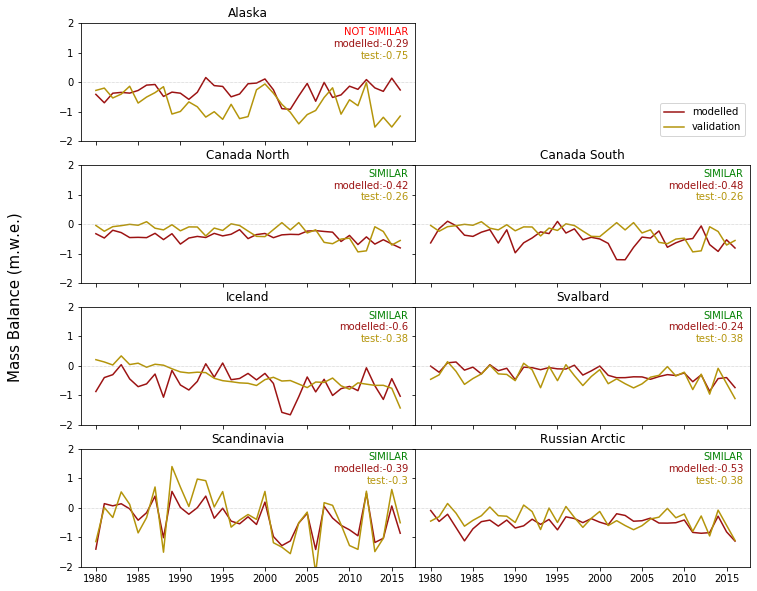

In [12]:
validation.val_plot()

/Users/anna/Desktop/PERSONAL/Data_Science/Portfolio_Projects/glacier_funct.py:1471: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


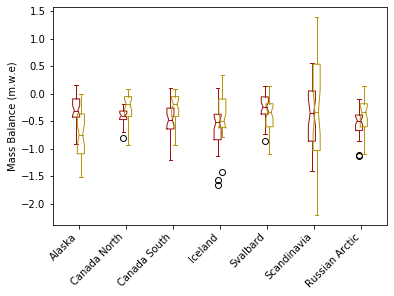

In [13]:
validation.val_box()

With the exception of Alaska, all regions meet the statistical requirement.

Let's investigate why Alaska, specifically, failed.

To do this, let's first break the mass balance up into its individual components of melt, accumulation, frontal ablation, and refreeze.

/Users/anna/Desktop/PERSONAL/Data_Science/Portfolio_Projects/glacier_funct.py:1600: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


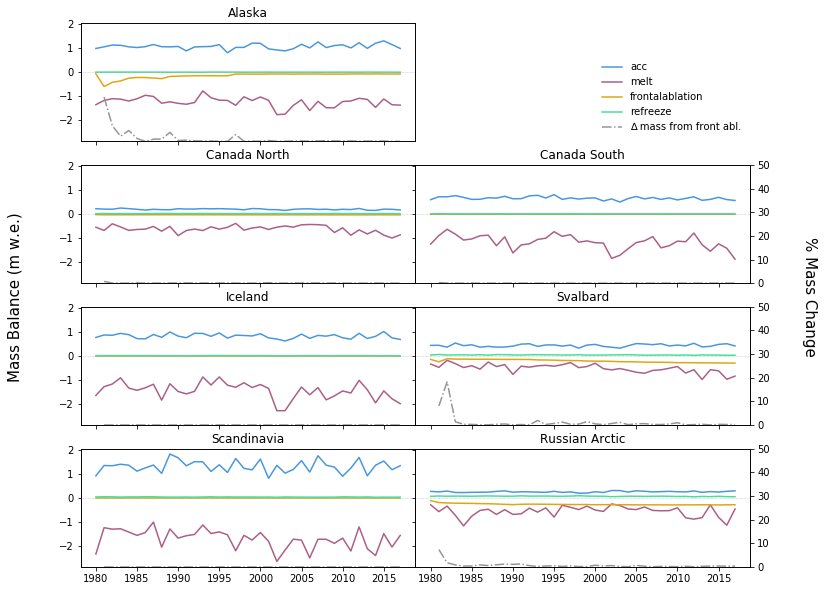

In [14]:
validation.component_plots()

As we can see, Alaskan glaciers with frontal ablation experience a sharp drop in the magnitude of mass balance (-20%) very at the beginning of the simulation and then is reduced to ~0. This is likely to be a modelling error. This also occurs in Svalbard. These results show us that these regions are likely to have issues with the way in which frontal ablation has been calculated by the model. Both Svalbard and Alaska will therefore be removed from further analysis. 

Now that the model has been calibrated, we can test the mass balance sensitivity to temperature and precipitation changes.

## 3. Analysis of Modelled Results

To model glacier mass balance sensitivity, a synthetic, steady climate was created from the continuous replication of 1995-2015 climate extracted from ERA-Interim. The temperature was increased by 1-3 °C and increased precipitation by 4% °C −1  for 2000 to 2100. To determine the relative impact of the 4% °C −1  precipitation increase on mass balance sensitivity, model runs were conducted in which temperature was increased by 1-3 °C but precipitation was held at its control scenario.

This modelling created six model outputs for Arctic Canada North, Arctic Canada South, Iceland, Scandinavia, and the Russian Arctic.

A Wilcoxon Signed Rank Test was used on subsequent datasets to determine whether the mean ranks of the populations differ after temperature increase.

We will use a class object I created to process for this purpose and analyze the data. For documentation/details please refer to the glac_funct.py file and the full Glacier Sensitivity notebook.

In [18]:
dat_fp=sorted(glob.glob(filepath+'/Project_Data/Modelled_Data/*.nc'))

#initialize object
mass_sens=gf.massbal_sensitivity(dat_fp, regions=[3,4,6,8,9])

T0_P0
3
4
6
8
9
T1_P4
3
4
6
8
9
T2_P8
3
4
6
8
9
T3_P12
3
4
6
8
9


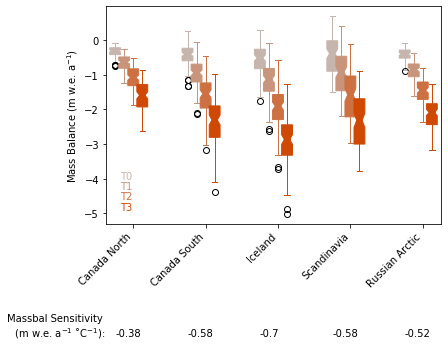

In [19]:
#calculate massbal sensitivity
mass_sens.sens_calc()
#visualize results with boxplots
mass_sens.sens_box()

The mass balance sensitivity is largest in Iceland (-0.7 m w.e a$^{-1}$ ˚C$^{-1}$), and smallest in Arctic Canada North (-0.38 m w.e a$^{-1}$ ˚C$^{-1}$), according to the modelled mass balance calculations. The mass balance sensitivity of the Russian Arctic, Scandinavia, and Arctic Canada South (-0.52, -0.58, and -0.58 m w.e a$^{-1}$ ˚C$^{-1}$, respectively)

According to the boxplots, Scandinavia, Iceland, and Arctic Canada South have large variability in their mean mass balance across all scenarios in comparison to the Russian Arctic and Arctic Canada North.

Let's see how precipitation influences mass balance by looking at how different the mass balance in these regions is with and without a 4% °C$^{-1}$ precipitation increase.

/Users/anna/Desktop/PERSONAL/Data_Science/Portfolio_Projects/glacier_funct.py:1940: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


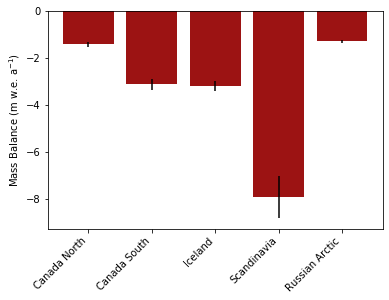

In [20]:
mass_sens.prec_impact()

The largest difference in mass balance with and without precipitation increase is in Scandinavia, followed by Iceland and Arctic Canada South. Arctic Canada North and the Russian Arctic both change relatively little with the addition of precipitaiton.

Let's see what further information we can gather from looking at how the volume changes over time.

/Users/anna/Desktop/PERSONAL/Data_Science/Portfolio_Projects/glacier_funct.py:2024: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


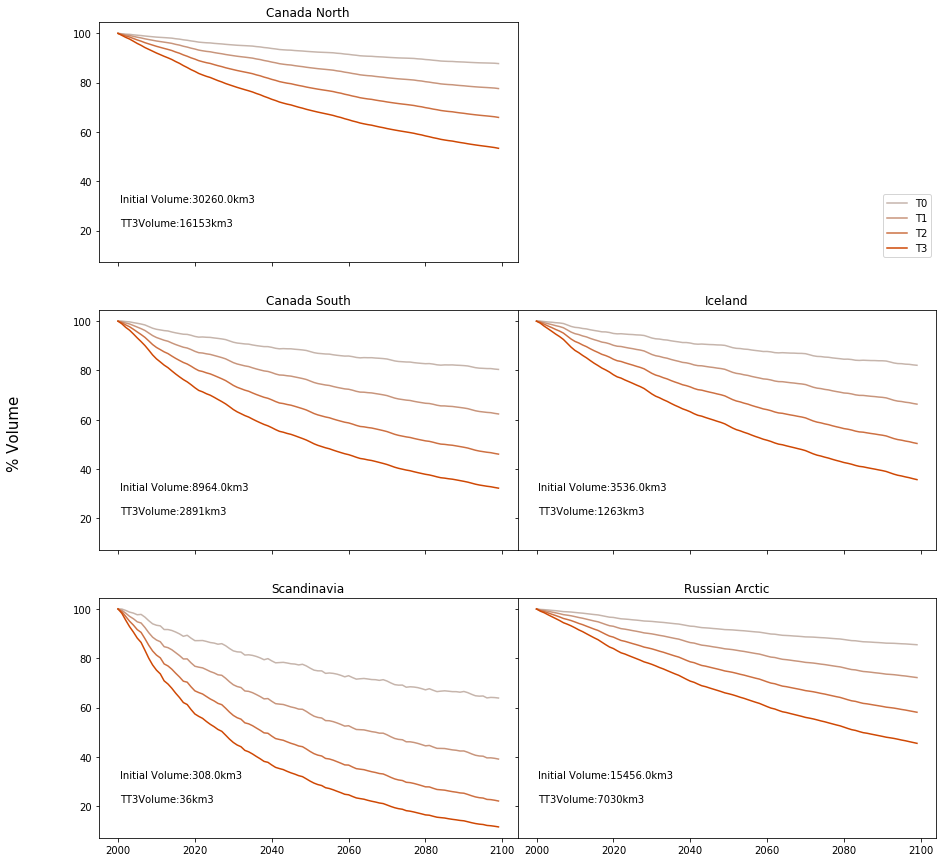

In [21]:
mass_sens.volume_plots()

Volume plots indicate that Scandinavia and Iceland, which are the two regions with the least glacier volume in total are the regions to lose the largest percentage of its total volume across temperature increase scenarios, whereas Arctic Canada North and the Russian Arctic, the two regions with the largest total glacier volume, lose the least.

These results are consistent with the fact that Iceland and Scandinavia have the largest mass balance sensitivity and are therefore likely to lose more of their volume as temperature increases, while Arctic Canada North and the Russian Arctic have a smaller sensitivity and will therefore lose less of their volume with the same increase.

Finally, let's see how each component of mass balance changes with temperature increase.

We will normalize the mass balance components to make them comparable across regions and climate simulation scenarios.

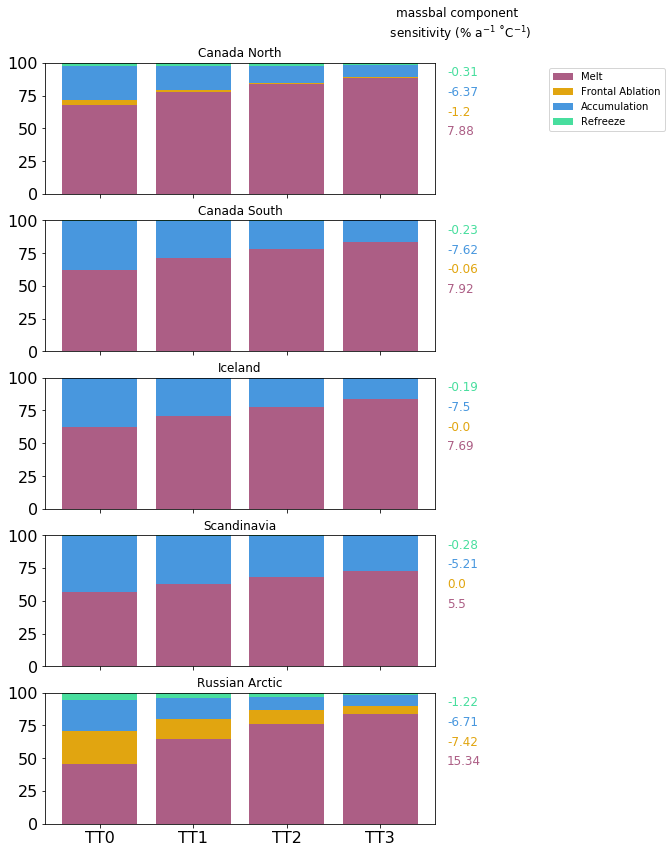

In [22]:
mass_sens.component_plots()

Across all regions, the relative influence of melt on mass balance increases with temperature increase, while the relative influence of all other components, including accumulation, decreases. These results suggest that mass balance across all regions will become increasingly melt-dominated with temperature increase.

## 4. Summary

In summary, Iceland is the region with the largest mass balance sensitivity of all the regions studied (-0.7 m w.e. a$^{-1}$ ˚C$^{-1}$). Iceland loses more than 70 % of its total glacier volume after 3 ˚C of temperature increase between 2000 and 2100. As mentioned previously, Iceland is considered a warm, maritime region with a low seasonal temperature amplitude (12 ˚C), relatively high mean annual temperature (1 ˚C) and relatively high levels of accumulation (each glacier receives > 0.5 m of snow annually). The situation is similar in Scandinavia, the second most sensitive region, as it is also considered a warm, maritime region. 

Arctic Canada North is the region with the smallest mass balance sensitivity of all regions studied (-0.38 m w.e. a$^{-1}$ ˚C$^{-1}$) and only loses ~ 50% of it's total glacier volume after 3 ˚C of temperature increase between 2000 and 2100. Arctic Canada North is considered a cold, continental region, with high seasonal temperature amplitude (~ 40 ˚C), low mean annual temperature (-21 ˚C), and relatively low levels of accumulation (each glacier receives ~ 0.15m of snowfall annually). The situation is similar in the Russian Arctic, the second least sensitive region. 

These results suggest that mass balance sensitivity is still dominated by the degree of continentality in the region. Glaciers in warm, maritime regions are likely to be more sensitive to temperature increase than glaciers in cold, continental regions. This is likely because the temperature in these warm, maritime regions hovers close to 0 ˚C for the majority of the accumulation season (the period of time snow falls on the glacier). If temperature is increased by even 1-3 ˚C, the temperatures during accumulation season would increase enough that the precipitation would fall as rainfall and therefore not contribute to glacier mass balance.

Therefore, these warm, wet regions will melt most rapidly in our warming climate. However, over a longer time period, glaciers in the cold, continental regions will contribute a larger volume of water to sea level rise, as these regions have larger total glacier volumes than small, maritime regions.